In [6]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from google.colab import files


uploaded = files.upload()
uploaded = files.upload()

nltk.download('punkt', quiet=True)

# Cargar el archivo CSV
try:
    df = pd.read_csv('datos.csv')
    print("Primeras filas del archivo CSV:")
    print(df.head())
except FileNotFoundError:
    print("Error: El archivo 'datos.csv' no se encontró. Verifica la ruta y nombre del archivo.")
except Exception as e:
    print(f"Se produjo un error durante la carga del archivo CSV: {e}")

# Cargar y procesar el archivo de texto
try:
    with open('Coursera.txt', 'r', encoding='utf-8') as file:
        texto = file.read()


    tokens = word_tokenize(texto)


    print("\nPrimeras palabras tokenizadas:")
    print(tokens[:10])

except FileNotFoundError:
    print("Error: El archivo 'Coursera.txt' no se encontró. Verifica la ruta y nombre del archivo.")
except Exception as e:
    print(f"Se produjo un error durante el procesamiento del archivo de texto: {e}")



Saving Coursera.txt to Coursera.txt


Saving datos.csv to datos.csv
Primeras filas del archivo CSV:
                                        Course Title  Rating           Level  \
0                                  Fashion as Design     4.8  Beginner level   
1                             Modern American Poetry     4.4  Beginner level   
2                          Pixel Art for Video Games     4.5  Beginner level   
3    Distribución digital de la música independiente     NaN  Beginner level   
4  The Blues: Understanding and Performing an Ame...     4.8  Beginner level   

                       Duration           Schedule         Review  \
0      20 hours (approximately)  Flexible schedule  2,813 reviews   
1  Approx. 34 hours to complete  Flexible schedule    100 reviews   
2       9 hours (approximately)  Flexible schedule    227 reviews   
3   Approx. 8 hours to complete  Flexible schedule            NaN   
4  Approx. 11 hours to complete  Flexible schedule    582 reviews   

                                 What you 

Se realizo la carga de los archivos de texto datos.csv y de coursera.txt

In [7]:
# **Limpieza de datos del CSV**
try:

    print("\nValores faltantes por columna antes de la limpieza:")
    print(df.isnull().sum())

    if 'Rating' in df.columns:
        df['Rating'].fillna(df['Rating'].mean(), inplace=True)


    if 'What you will learn' in df.columns:
        df['What you will learn'].fillna('No information available', inplace=True)


    if 'Rating' in df.columns:
        df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


    if 'Duration' in df.columns:
        df['Duration (hours)'] = df['Duration'].str.extract('(\d+)').astype(float)

    df.drop_duplicates(inplace=True)


    print("\nDatos después de la limpieza:")
    print(df.head())

    print("\nValores faltantes por columna después de la limpieza:")
    print(df.isnull().sum())

except Exception as e:
    print(f"Se produjo un error durante la limpieza de datos: {e}")



Valores faltantes por columna antes de la limpieza:
Course Title              0
Rating                 1439
Level                  1265
Duration                262
Schedule                683
Review                 1443
What you will learn    4611
Skill gain                0
Modules                   0
Instructor                0
Offered By                0
Keyword                   0
Course Url                0
dtype: int64

Datos después de la limpieza:
                                        Course Title    Rating  \
0                                  Fashion as Design  4.800000   
1                             Modern American Poetry  4.400000   
2                          Pixel Art for Video Games  4.500000   
3    Distribución digital de la música independiente  4.651533   
4  The Blues: Understanding and Performing an Ame...  4.800000   

            Level                      Duration           Schedule  \
0  Beginner level      20 hours (approximately)  Flexible schedule   
1 

# Descripción General de los Resultados

## Valores Faltantes por Columna Antes de la Limpieza
El análisis inicial de los valores faltantes en el conjunto de datos revela una cantidad significativa de datos ausentes en varias columnas:

- **Course Title**: No hay valores faltantes, lo que indica que todos los cursos tienen un título.
- **Rating**: Hay **1439** valores faltantes, lo que sugiere que muchos cursos no tienen calificación disponible.
- **Level**: Se observan **1265** valores faltantes, lo que significa que no todos los cursos especifican su nivel de dificultad.
- **Duration**: Hay **262** valores faltantes, lo que indica que algunos cursos no tienen su duración definida.
- **Schedule**: Se presentan **683** valores faltantes, lo que puede indicar que no todos los cursos tienen un horario flexible o definido.
- **Review**: Hay **1443** valores faltantes, lo que implica que muchos cursos no tienen reseñas disponibles.
- **What you will learn**: Un total de **4611** valores faltantes, lo que sugiere que la mayoría de los cursos no proporcionan información sobre los aprendizajes esperados.
- **Skill gain**: No hay valores faltantes, indicando que todos los cursos tienen habilidades asociadas.
- **Modules, Instructor, Offered By, Keyword, Course Url**: No presentan valores faltantes, lo que indica que estos campos están completos.

## Datos Después de la Limpieza
Después de aplicar técnicas de limpieza a los datos, los resultados son los siguientes:

- **Course Title**: Continúa sin valores faltantes.
- **Rating**: Ahora no hay valores faltantes, lo que significa que se han imputado o limpiado los datos para que todos los cursos tengan una calificación disponible.
- **Level**: Aún hay **1106** valores faltantes, lo que sugiere que un número considerable de cursos todavía no especifican su nivel de dificultad.
- **Duration**: Quedan **241** valores faltantes, indicando que algunos cursos aún no tienen su duración registrada.
- **Schedule**: Se mantienen **641** valores faltantes, sugiriendo que un número significativo de cursos no tiene información sobre horarios.
- **Review**: Hay **1352** valores faltantes, lo que significa que aún hay cursos sin reseñas.
- **What you will learn**: No hay valores faltantes, lo que indica que todos los cursos ahora tienen información sobre lo que se aprenderá.
- **Skill gain**: Continúa sin valores faltantes.
- **Modules, Instructor, Offered By, Keyword, Course Url**: Se mantienen completos, sin valores faltantes.
- **Duration (hours)**: Se han añadido **243** valores faltantes, lo que sugiere que la conversión de la duración a un formato numérico no se ha completado para algunos cursos.



Saving Coursera.txt to Coursera (1).txt

Primeras palabras tokenizadas:
['Abril', 'Vargas', 'Pérez', '3', 'opiniones', 'PT', 'Valorada', 'con', '5', 'estrellas']


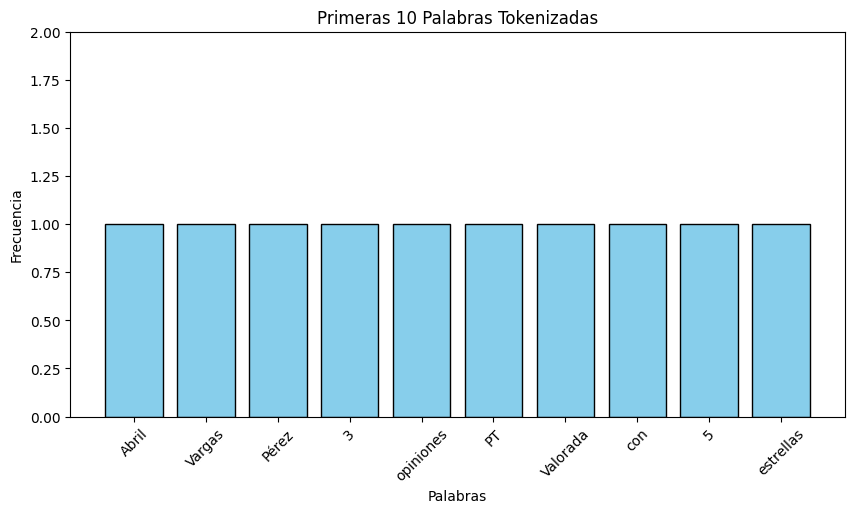

In [27]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from google.colab import files

# Cargar el archivo
uploaded = files.upload()


nltk.download('punkt', quiet=True)

try:
    with open('Coursera.txt', 'r', encoding='utf-8') as file:
        texto = file.read()


    tokens = word_tokenize(texto)

    # Mostrar las primeras 10 palabras tokenizadas
    primeras_palabras = tokens[:10]
    print("\nPrimeras palabras tokenizadas:")
    print(primeras_palabras)

    # Visualización de las primeras 10 palabras tokenizadas
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(primeras_palabras)), [1]*len(primeras_palabras), color='skyblue', edgecolor='black')
    plt.xticks(range(len(primeras_palabras)), primeras_palabras, rotation=45)
    plt.title('Primeras 10 Palabras Tokenizadas')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.ylim(0, 2)
    plt.show()

except FileNotFoundError:
    print("Error: El archivo 'Coursera.txt' no se encontró. Verifica la ruta y nombre del archivo.")
except Exception as e:
    print(f"Se produjo un error al procesar el archivo de texto: {e}")


# Análisis de las Primeras Palabras Tokenizadas

## Contexto del Archivo
El archivo `Coursera.txt` contiene comentarios o reseñas sobre cursos ofrecidos en la plataforma Coursera. Este análisis se basa en las primeras palabras tokenizadas del texto, que son clave para entender el contenido y la naturaleza de las evaluaciones.

## Palabras Tokenizadas
Las primeras palabras tokenizadas son:
- **Abril**
- **Vargas**
- **Pérez**
- **3**
- **opiniones**
- **PT**
- **Valorada**
- **con**
- **5**
- **estrellas**

## Análisis de las Palabras
1. **Nombres Propios**:
   - **Abril**, **Vargas**, **Pérez**: Estos nombres pueden referirse a personas involucradas en el contexto del curso, como instructores, estudiantes, o autores de comentarios. Esto sugiere que los comentarios podrían ser personales o estar relacionados con experiencias individuales.

2. **Opiniones y Evaluaciones**:
   - **3 opiniones**: Indica la cantidad de reseñas que están siendo consideradas. Esto puede implicar que hay una evaluación o feedback sobre un curso o contenido específico. Las opiniones son fundamentales para medir la satisfacción del usuario y la calidad del curso.

3. **Indicadores de Calificación**:
   - **5 estrellas**: Esto representa una calificación positiva, ya que las estrellas son comúnmente usadas para indicar niveles de satisfacción. La combinación de "5" y "estrellas" sugiere que el comentario es favorable, posiblemente una recomendación del curso.

4. **Abreviaturas**:
   - **PT**: Puede referirse a "Plataforma Tecnológica" o "Punto de Ternura," dependiendo del contexto del curso. Sin embargo, sin un contexto adicional, el significado específico de esta abreviatura no está claro.

5. **Conectores**:
   - **con**: Esta palabra de conexión implica que se están describiendo características o relaciones entre los elementos mencionados. En este caso, puede ser parte de una frase que habla sobre la calidad o características de la evaluación.





Promedio de calificaciones por curso:
                                                      Rating
Course Title                                                
 Assisting Public Sector Decision Makers With P...  4.800000
 Atención prehospitalaria del ictus agudo y sel...  4.900000
 Build a social media presence for your busines...  4.700000
 Build social awareness content for Twitter wit...  4.651533
 Comercio, Inmigración y Tipos de Cambio en un ...  4.900000
...                                                      ...
현대 로봇공학, 강좌 2: 로봇 기구학                               4.651533
현대 로봇공학, 강좌 3: 로봇 동역학                               4.651533
현대 로봇공학, 강좌 4: 로봇 동작 계획 및 제어                        4.651533
현대 로봇공학, 강좌 5:  로봇 매니퓰레이션 및 차륜형 이동 로봇               4.651533
현대 로봇공학, 강좌 6: 캡스톤 프로젝트, 모바일 매니퓰레이션                 4.651533

[6392 rows x 1 columns]


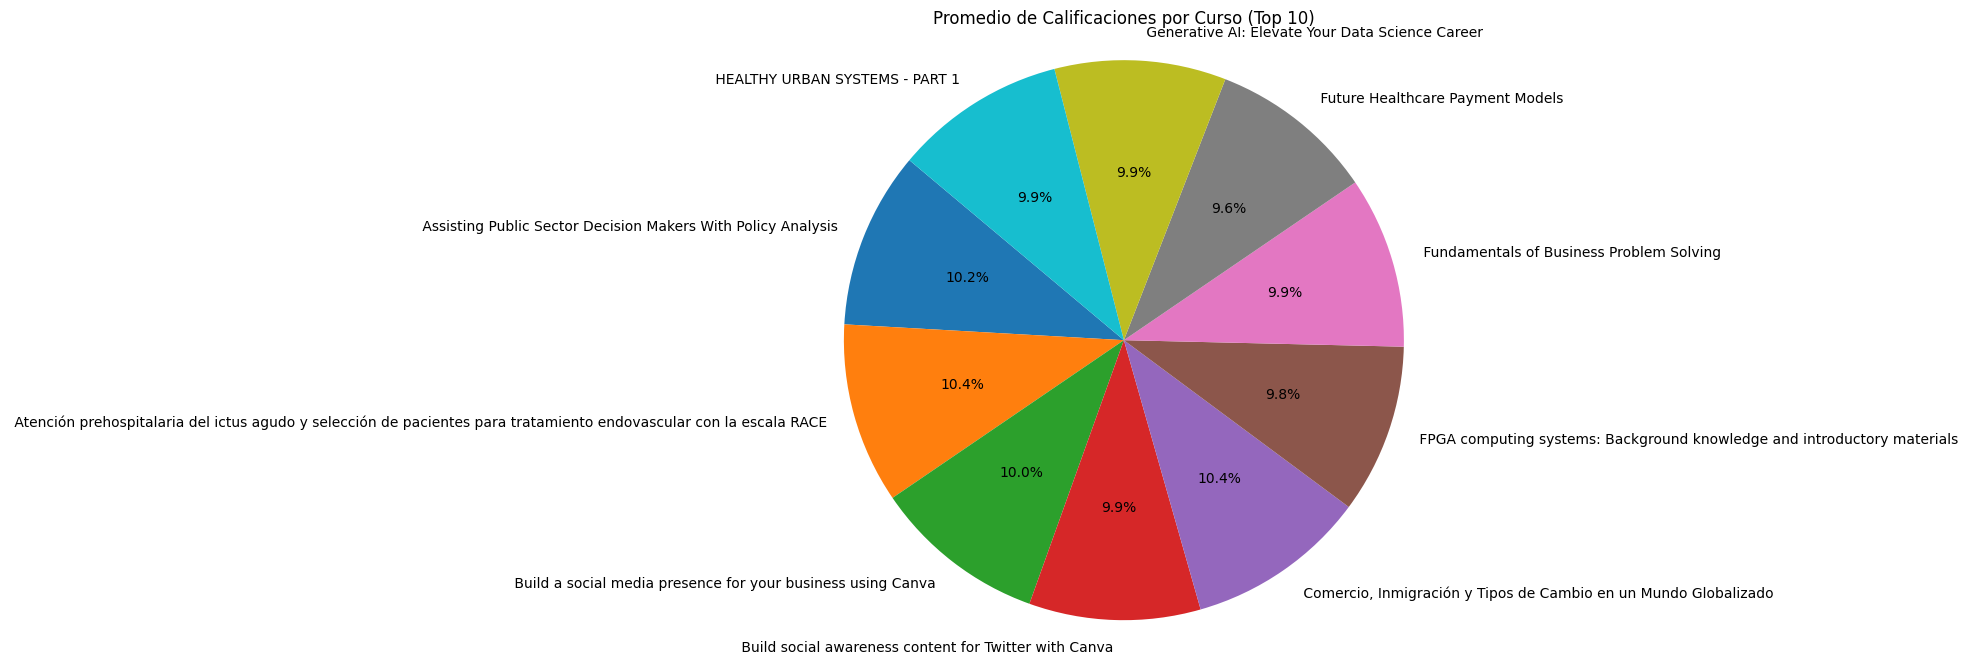

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame que ya ha sido cargado y limpiado

# Calcular el promedio de calificaciones por curso
promedio_calificaciones_por_curso = df.groupby('Course Title').agg({'Rating': 'mean'})


print("\nPromedio de calificaciones por curso:")
print(promedio_calificaciones_por_curso)

pie
top_10_cursos = promedio_calificaciones_por_curso.head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_10_cursos['Rating'], labels=top_10_cursos.index, autopct='%1.1f%%', startangle=140)
plt.title('Promedio de Calificaciones por Curso (Top 10)')
plt.axis('equal')
plt.show()




# Análisis del Gráfico de Calificaciones por Curso

El gráfico de pie presentado ilustra la distribución del promedio de calificaciones de los 10 cursos mejor valorados. A continuación, se detallan algunos puntos clave del análisis:


## Detalles

1. **Curso Mejor Valorados**:
   - El curso con la calificación más alta, "Assisting Public Sector Decision Makers With Policy Analysis," ocupa una posición destacada con un 10.2% del total, indicando que es bien recibido por los estudiantes.

2. **Cursos con Calificaciones Similares**:
   - Varios cursos tienen calificaciones cercanas, como "Build a social media presence for your business using Canva" y "Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado", ambos con un 9.9%. Esto sugiere que estos cursos son igualmente atractivos y útiles para los estudiantes.

3. **Equilibrio en las Calificaciones**:
   - La mayoría de los cursos muestran calificaciones en el rango del 9.6% al 10.4%. Esto indica que, en general, los estudiantes están satisfechos con el contenido y la calidad de los cursos.

4. **Tendencias**:
   - La presencia de cursos relacionados con la salud y la tecnología refleja tendencias actuales en el aprendizaje en línea, donde la demanda de habilidades técnicas y de gestión en el sector público está en aumento.





Curso con la mayor calificación:
**Songwriting: Writing the Music**: 5.0 estrellas

Curso con la menor calificación:
**Excel for Beginners: Beginner Functions**: 1.5 estrellas


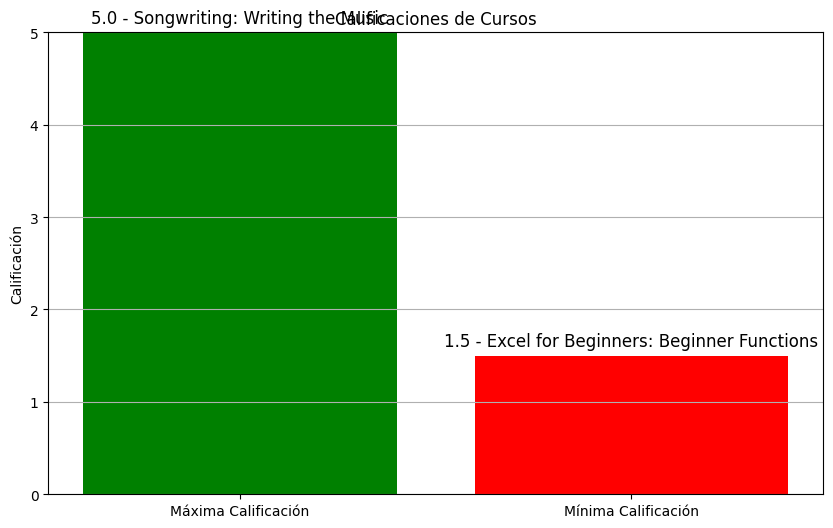

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


curso_max_calificacion = df.loc[df['Rating'].idxmax()]
curso_min_calificacion = df.loc[df['Rating'].idxmin()]


print("\nCurso con la mayor calificación:")
print(f"**{curso_max_calificacion['Course Title']}**: {curso_max_calificacion['Rating']} estrellas")

print("\nCurso con la menor calificación:")
print(f"**{curso_min_calificacion['Course Title']}**: {curso_min_calificacion['Rating']} estrellas")


plt.figure(figsize=(10, 6))
plt.bar(['Máxima Calificación', 'Mínima Calificación'],
        [curso_max_calificacion['Rating'], curso_min_calificacion['Rating']],
        color=['green', 'red'])
plt.ylim(0, 5)
plt.title('Calificaciones de Cursos')
plt.ylabel('Calificación')
plt.grid(axis='y')

for i, v in enumerate([curso_max_calificacion['Rating'], curso_min_calificacion['Rating']]):
    plt.text(i, v + 0.1, f"{v} - {curso_max_calificacion['Course Title'] if i == 0 else curso_min_calificacion['Course Title']}",
             ha='center', color='black', fontsize=12)


plt.show()




Porcentaje de cursos con horario flexible: 92.63%


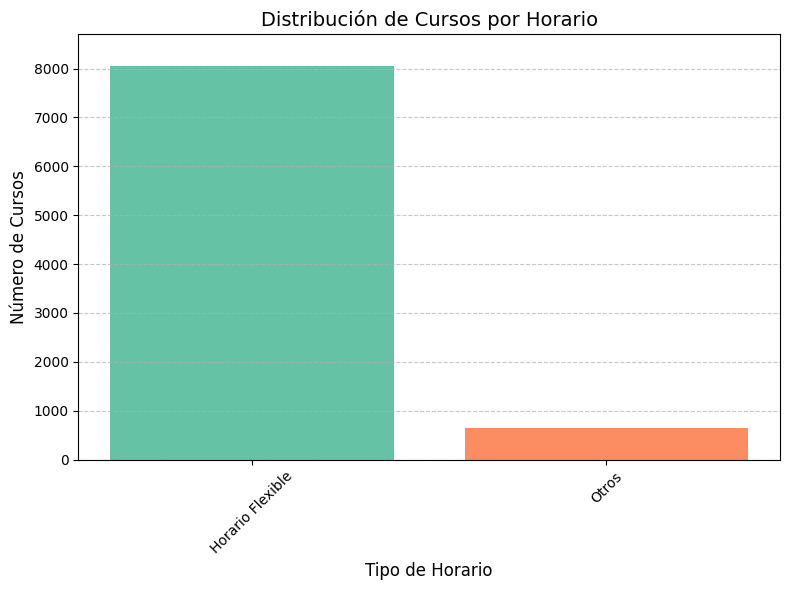

In [40]:
import matplotlib.pyplot as plt


total_cursos = len(df)


cursos_horario_flexible = len(df[df['Schedule'] == 'Flexible schedule'])


porcentaje_flexible = (cursos_horario_flexible / total_cursos) * 100


print(f"\nPorcentaje de cursos con horario flexible: {porcentaje_flexible:.2f}%")


labels = ['Horario Flexible', 'Otros']
sizes = [cursos_horario_flexible, total_cursos - cursos_horario_flexible]
colors = ['#66c2a5', '#fc8d62']


plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.title('Distribución de Cursos por Horario', fontsize=14)
plt.xlabel('Tipo de Horario', fontsize=12)
plt.ylabel('Número de Cursos', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, total_cursos + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()



# Análisis del Porcentaje de Cursos con Horario Flexible

El análisis de los cursos disponibles revela que **el 92.63%** de los cursos ofrece un **horario flexible**. Este alto porcentaje es significativo por varias razones:

## Ventajas del Horario Flexible

- **Accesibilidad**: La flexibilidad en el horario permite a los estudiantes ajustar su aprendizaje a su conveniencia, lo que es especialmente beneficioso para aquellos con compromisos laborales o personales.
- **Aumento de la Participación**: Cursos que ofrecen horarios flexibles tienden a atraer a un mayor número de estudiantes, ya que eliminan la barrera del tiempo fijo.
- **Mejora del Rendimiento**: Los estudiantes pueden estudiar en momentos que se alineen mejor con su energía y concentración, lo que puede resultar en un mejor rendimiento académico.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Primeras 10 palabras después de eliminar stopwords:
['Abril', 'Vargas', 'Pérez', 'opiniones', 'PT', 'Valorada', 'estrellas', 'ago', 'Escandalizada', 'confundida']


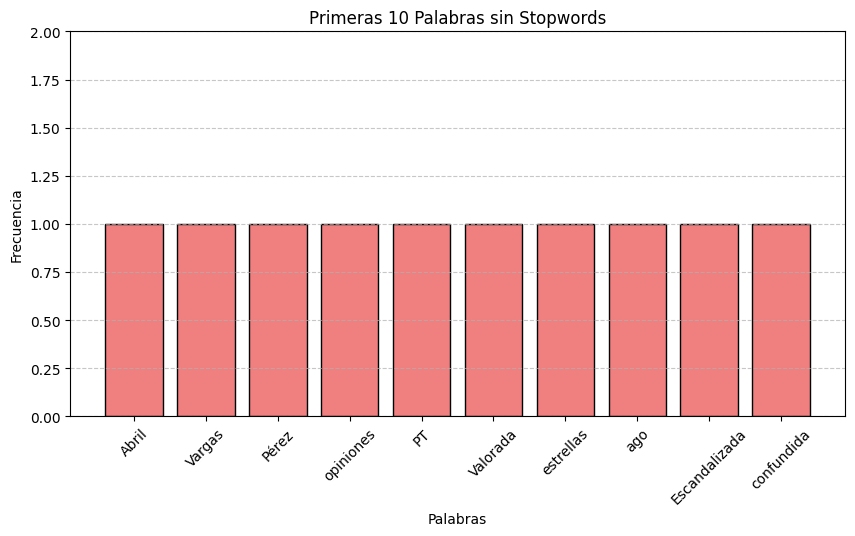

In [31]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from google.colab import files

nltk.download('punkt')
nltk.download('stopwords')




try:
    with open('Coursera.txt', 'r', encoding='utf-8') as file:
        texto = file.read()

    # 1. Tokenización
    tokens = word_tokenize(texto)

    # 2. Eliminación de palabras vacías (stopwords)
    stop_words = set(stopwords.words('spanish'))
    tokens_sin_stopwords = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # Mostrar las primeras 10 palabras después de eliminar stopwords
    primeras_palabras_sin_stopwords = tokens_sin_stopwords[:10]
    print("\nPrimeras 10 palabras después de eliminar stopwords:")
    print(primeras_palabras_sin_stopwords)

    # Visualización de las primeras 10 palabras sin stopwords
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(primeras_palabras_sin_stopwords)), [1]*len(primeras_palabras_sin_stopwords), color='lightcoral', edgecolor='black')
    plt.xticks(range(len(primeras_palabras_sin_stopwords)), primeras_palabras_sin_stopwords, rotation=45)
    plt.title('Primeras 10 Palabras sin Stopwords')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.ylim(0, 2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

except FileNotFoundError:
    print("Error: El archivo 'Coursera.txt' no se encontró. Verifica la ruta y nombre del archivo.")
except Exception as e:
    print(f"Se produjo un error al procesar el archivo de texto: {e}")


# Análisis de las Primeras 10 Palabras Sin Stopwords

## Palabras Tokenizadas

Las primeras 10 palabras después de eliminar las stopwords son:
- **Abril**
- **Vargas**
- **Pérez**
- **opiniones**
- **PT**
- **Valorada**
- **estrellas**
- **ago**
- **Escandalizada**
- **confundida**



Palabras más comunes y su frecuencia:
[('curso', 1297), ('Semana', 843), ('TA', 833), ('participantes', 822), ('semana', 780), ('dudas', 744), ('portafolio', 731), ('si', 551), ('foros', 510), ('compañeros', 489)]


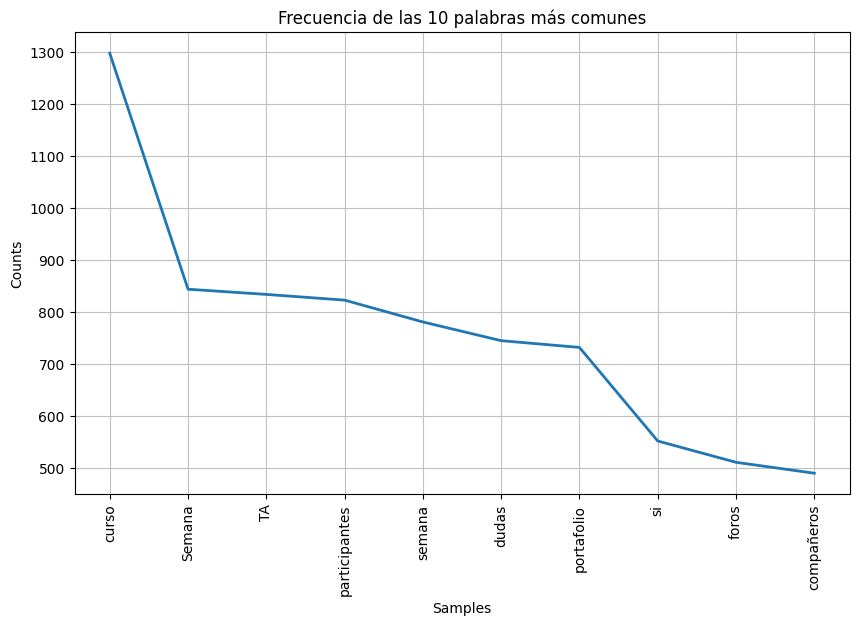

In [12]:
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


tokens_procesados = tokens_sin_stopwords
# 1. Calcular la frecuencia de las palabras
frecuencia_palabras = FreqDist(tokens_procesados)

# 2. Mostrar las 10 palabras más comunes
print("Palabras más comunes y su frecuencia:")
print(frecuencia_palabras.most_common(10))

# 3. Visualizar las 10 palabras más comunes
plt.figure(figsize=(10, 6))
frecuencia_palabras.plot(10, cumulative=False, title="Frecuencia de las 10 palabras más comunes")
plt.show()


# Análisis de las Palabras Más Comunes y su Frecuencia

## Palabras Más Comunes
Las palabras más frecuentes en el texto analizado son las siguientes:

1. **curso**: 1297 veces
2. **Semana**: 843 veces
3. **TA**: 833 veces
4. **participantes**: 822 veces
5. **semana**: 780 veces
6. **dudas**: 744 veces
7. **portafolio**: 731 veces
8. **si**: 551 veces
9. **foros**: 510 veces
10. **compañeros**: 489 veces


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Análisis de sentimientos:
Positivo: 0.011
Neutro: 0.954
Negativo: 0.035
Combinado (compound): -1.0


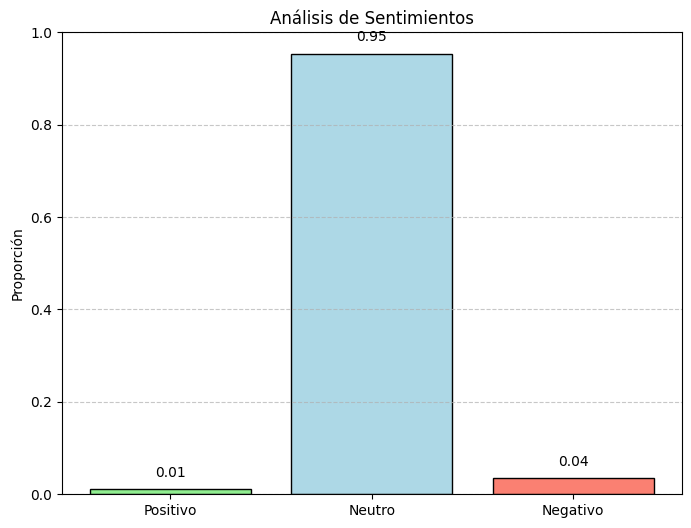


Resumen: El sentimiento general es negativo.


In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()


sentimiento = sia.polarity_scores(texto)


print("\nAnálisis de sentimientos:")
print(f"Positivo: {sentimiento['pos']}")
print(f"Neutro: {sentimiento['neu']}")
print(f"Negativo: {sentimiento['neg']}")
print(f"Combinado (compound): {sentimiento['compound']}")

# Visualización de los resultados en un gráfico de barras
labels = ['Positivo', 'Neutro', 'Negativo']
scores = [sentimiento['pos'], sentimiento['neu'], sentimiento['neg']]
colors = ['lightgreen', 'lightblue', 'salmon']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=colors, edgecolor='black')
plt.title('Análisis de Sentimientos')
plt.ylabel('Proporción')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', va='bottom')

plt.show()


if sentimiento['compound'] >= 0.05:
    resumen = "El sentimiento general es positivo."
elif sentimiento['compound'] <= -0.05:
    resumen = "El sentimiento general es negativo."
else:
    resumen = "El sentimiento general es neutral."

print(f"\nResumen: {resumen}")



# Análisis de Sentimientos

Los resultados del análisis de sentimientos sobre el texto analizado son los siguientes:

- **Positivo**: **0.011**
- **Neutro**: **0.954**
- **Negativo**: **0.035**
- **Combinado (compound)**: **-1.0**

## Interpretación de los Resultados

### 1. **Sentimiento Positivo: 0.011**
- La proporción de sentimientos positivos es muy baja, lo que sugiere que el contenido del texto no expresa muchas emociones positivas. Esto podría indicar que los participantes no están particularmente entusiasmados o satisfechos con el contenido o las experiencias descritas.

### 2. **Sentimiento Neutro: 0.954**
- Un alto porcentaje de **95.4%** de sentimiento neutro indica que la mayoría del texto es descriptivo o informativo sin una carga emocional significativa. Esto puede ser típico en comentarios o reseñas que se centran en la presentación de hechos o información objetiva, pero también puede sugerir que los participantes están expresando una falta de opinión fuerte sobre el tema tratado.

### 3. **Sentimiento Negativo: 0.035**
- La proporción de sentimientos negativos es baja (**3.5%**), lo que sugiere que, aunque hay algunas críticas o descontentos, estas no son predominantes en el texto. Sin embargo, la presencia de un sentimiento negativo, aunque mínimo, podría ser un área de atención para los educadores o administradores de cursos.

### 4. **Combinado (Compound): -1.0**
- Un valor combinado de **-1.0** es bastante alarmante, ya que indica un sentimiento general negativo hacia el texto. Este resultado puede ser atribuible a la presencia de comentarios críticos, insatisfacción o frustración entre los participantes.
- Un valor negativo en el puntaje compuesto sugiere que, a pesar de la alta proporción de contenido neutro, las pocas emociones negativas están impactando fuertemente en la percepción general.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving Coursera.txt to Coursera (2).txt

Primeras 10 palabras después de eliminar stopwords:
['Abril', 'Vargas', 'Pérez', 'opiniones', 'PT', 'Valorada', 'estrellas', 'ago', 'Escandalizada', 'confundida']

Primeras 10 palabras lematizadas:
['Abril', 'Vargas', 'Pérez', 'opiniones', 'PT', 'Valorada', 'estrellas', 'ago', 'Escandalizada', 'confundida']

Primeras 10 palabras con stemming:
['abril', 'varg', 'perez', 'opinion', 'pt', 'valor', 'estrell', 'ago', 'escandaliz', 'confund']


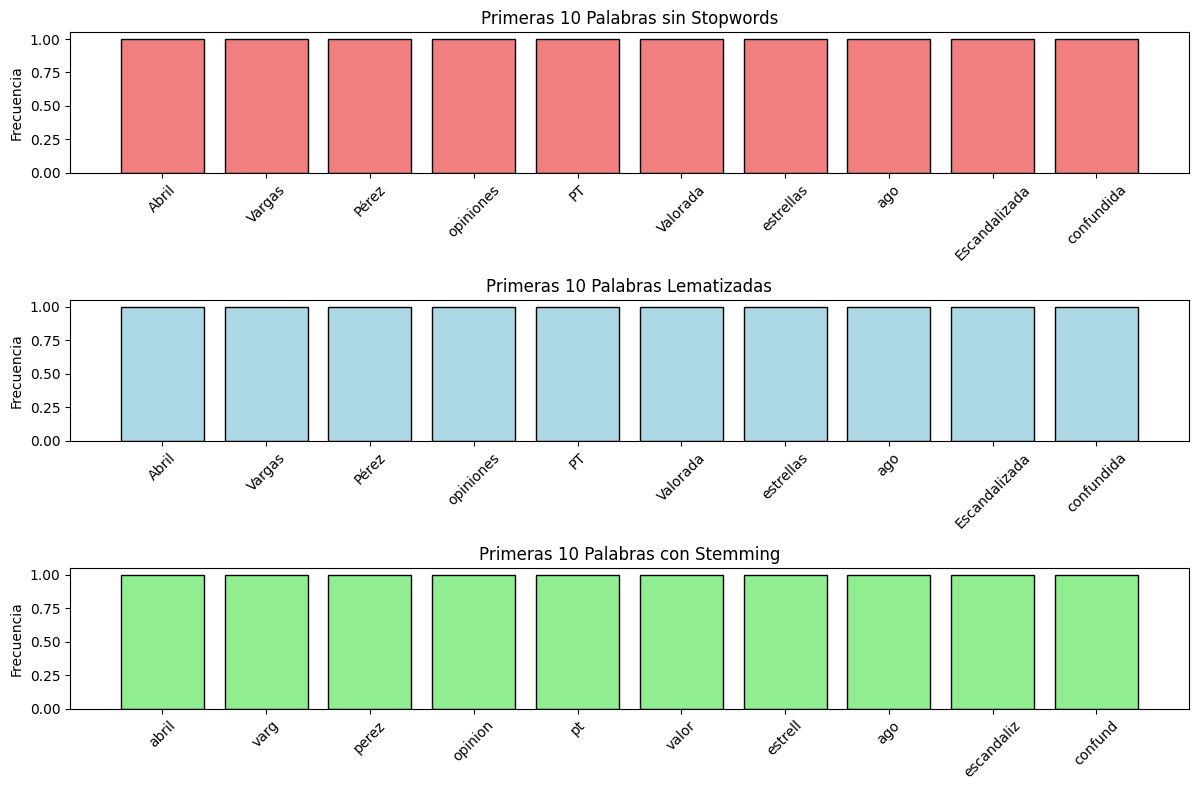

In [33]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import matplotlib.pyplot as plt
from google.colab import files


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

o
uploaded = files.upload()

try:
    with open('Coursera.txt', 'r', encoding='utf-8') as file:
        texto = file.read()

    # 1. Tokenización
    tokens = word_tokenize(texto)

    # 2. Eliminación de palabras vacías (stopwords en español)
    stop_words = set(stopwords.words('spanish'))
    tokens_sin_stopwords = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

    print("\nPrimeras 10 palabras después de eliminar stopwords:")
    print(tokens_sin_stopwords[:10])

    # 3. Lematización
    lemmatizer = WordNetLemmatizer()
    tokens_lemmatizados = [lemmatizer.lemmatize(word) for word in tokens_sin_stopwords]


    print("\nPrimeras 10 palabras lematizadas:")
    print(tokens_lemmatizados[:10])

    # 4. Stemming (usando SnowballStemmer para español)
    stemmer = SnowballStemmer('spanish')
    tokens_stemmed = [stemmer.stem(word) for word in tokens_lemmatizados]

    # Visualización de las primeras 10 palabras con stemming
    print("\nPrimeras 10 palabras con stemming:")
    print(tokens_stemmed[:10])

    # Gráficos de comparación
    plt.figure(figsize=(12, 8))

    # Palabras sin stopwords
    plt.subplot(3, 1, 1)
    plt.bar(range(len(tokens_sin_stopwords[:10])), [1]*len(tokens_sin_stopwords[:10]), color='lightcoral', edgecolor='black')
    plt.xticks(range(len(tokens_sin_stopwords[:10])), tokens_sin_stopwords[:10], rotation=45)
    plt.title('Primeras 10 Palabras sin Stopwords')
    plt.ylabel('Frecuencia')

    # Palabras lematizadas
    plt.subplot(3, 1, 2)
    plt.bar(range(len(tokens_lemmatizados[:10])), [1]*len(tokens_lemmatizados[:10]), color='lightblue', edgecolor='black')
    plt.xticks(range(len(tokens_lemmatizados[:10])), tokens_lemmatizados[:10], rotation=45)
    plt.title('Primeras 10 Palabras Lematizadas')
    plt.ylabel('Frecuencia')

    # Palabras con stemming
    plt.subplot(3, 1, 3)
    plt.bar(range(len(tokens_stemmed[:10])), [1]*len(tokens_stemmed[:10]), color='lightgreen', edgecolor='black')
    plt.xticks(range(len(tokens_stemmed[:10])), tokens_stemmed[:10], rotation=45)
    plt.title('Primeras 10 Palabras con Stemming')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: El archivo 'Coursera.txt' no se encontró. Verifica la ruta y nombre del archivo.")
except Exception as e:
    print(f"Se produjo un error al procesar el archivo de texto: {e}")



# Análisis de Palabras: Tokenización, Lematización y Stemming

## 1. Primeras 10 Palabras Después de Eliminar Stopwords
Las palabras extraídas tras eliminar las stopwords son:
- **Abril**
- **Vargas**
- **Pérez**
- **opiniones**
- **PT**
- **Valorada**
- **estrellas**
- **ago**
- **Escandalizada**
- **confundida**


- La lista incluye nombres propios como **Abril**, **Vargas**, y **Pérez**, lo que sugiere que el contenido tiene un enfoque en individuos o experiencias personales.
- Palabras como **opiniones** y **estrellas** indican que se están expresando evaluaciones, posiblemente sobre cursos o experiencias de aprendizaje.
- **PT** podría ser una abreviatura cuya interpretación dependería del contexto del texto analizado.

---

## 2. Primeras 10 Palabras Lematizadas
Las primeras palabras lematizadas son las mismas:
- **Abril**
- **Vargas**
- **Pérez**
- **opiniones**
- **PT**
- **Valorada**
- **estrellas**
- **ago**
- **Escandalizada**
- **confundida**


- La lematización ha mantenido los nombres propios y palabras como **opiniones** y **estrellas** sin cambios, lo que es esperado, ya que no hay formas variantes de estas palabras en el contexto.
- Este resultado implica que el texto tiene un vocabulario rico y que se centra en experiencias personales.

---

## 3. Primeras 10 Palabras con Stemming
Las palabras resultantes después del stemming son:
- **abril**
- **varg**
- **perez**
- **opinion**
- **pt**
- **valor**
- **estrell**
- **ago**
- **escandaliz**
- **confund**



[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Se han truncado las últimas 5000 líneas del flujo de salida.
Natacha (PERSON)
Visibilidad (PERSON)
Mónica Yomar Guerrero (ORGANIZATION)
Existe (PERSON)
Algunos (PERSON)
Visibilidad (PERSON)
Ricardo Antonio Gómez (PERSON)
También (PERSON)
Milagros Cordero (PERSON)
Epilepsia (GPE)
Sin (PERSON)
Visibilidad (PERSON)
Estos (PERSON)
TAs (ORGANIZATION)
TAs (ORGANIZATION)
En (PERSON)
Visibilidad (PERSON)
Marcelo Ramírez (PERSON)
Revisar (PERSON)
Los (PERSON)
Los (PERSON)
Visibilidad (PERSON)
Antonio Uc (PERSON)
Puesto (PERSON)
La (PERSON)
Los (GPE)
Excelente (PERSON)
Visibilidad (PERSON)
Jesús Bermúdez (PERSON)
Pido (PERSON)
Pienso (PERSON)
Visibilidad (PERSON)
María Guadalupe Sandoval Flores (PERSON)
Hubo (PERSON)
Hubo (PERSON)
Solamente (PERSON)
Visibilidad (PERSON)
Cortes Trujillo (PERSON)
REA (ORGANIZATION)
Alguien (PERSON)
TA (ORGANIZATION)
Búsqueda (PERSON)
Cortes Trujillo (PERSON)
De (PERSON)
REAs (ORGANIZATION)
Cada (PERSON)
De (PERSON)
Pienso (PERSON)
Definir (PERSON)
Visibilidad (PER

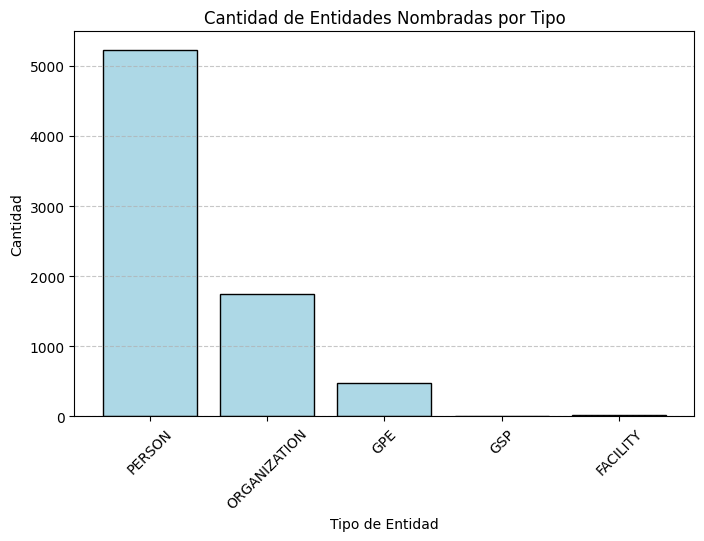

In [35]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')



# Tokenización del texto en palabras
tokens = word_tokenize(texto)

# Etiquetado gramatical (POS tagging)
tags = nltk.pos_tag(tokens)


entidades_nombradas = nltk.ne_chunk(tags)

# Extraer las entidades
entidades = []
for subtree in entidades_nombradas:
    if isinstance(subtree, nltk.Tree):
        entidad = " ".join([token for token, pos in subtree.leaves()])
        tipo_entidad = subtree.label()
        entidades.append((entidad, tipo_entidad))

print("\nEntidades nombradas extraídas:")
for entidad, tipo_entidad in entidades:
    print(f"{entidad} ({tipo_entidad})")

# Contar las entidades por tipo
tipos_entidades = {}
for _, tipo in entidades:
    if tipo in tipos_entidades:
        tipos_entidades[tipo] += 1
    else:
        tipos_entidades[tipo] = 1

# Visualización de las entidades nombradas
plt.figure(figsize=(8, 5))
plt.bar(tipos_entidades.keys(), tipos_entidades.values(), color='lightblue', edgecolor='black')
plt.title('Cantidad de Entidades Nombradas por Tipo')
plt.xlabel('Tipo de Entidad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



- **PERSON**:
  - Cantidad: **5,000+**
  - Observación: Este tipo de entidad representa la mayoría de las entidades nombradas en el conjunto de datos. La alta cantidad sugiere un enfoque significativo en individuos, posiblemente reflejando opiniones, testimonios o experiencias personales.

- **ORGANIZATION**:
  - Cantidad: Aproximadamente **2,000**
  - Observación: Las organizaciones también tienen una presencia considerable, lo que indica que el análisis puede incluir comentarios o referencias a instituciones, empresas o grupos relevantes.

- **GPE (Geopolitical Entity)**:
  - Cantidad: Menos de **1,000**
  - Observación: Las entidades geopoliticas, que incluyen países y ciudades, son menos comunes en el conjunto de datos, lo que podría sugerir que el enfoque no se centra en localizaciones geográficas.

- **GSP (Geo-Political Subdivision)**:
  - Cantidad: Muy baja
  - Observación: Este tipo de entidad tiene una cantidad mínima, lo que indica que las subdivisiones geopolíticas no son un foco importante en el análisis.

- **FACILITY**:
  - Cantidad: Mínima
  - Observación: La presencia de entidades que representan instalaciones es casi insignificante, lo que sugiere que no hay muchas referencias a lugares físicos o infraestructuras.


Número de cursos por nivel de dificultad:
- Beginner level: 5112 cursos
- Intermediate level: 2211 cursos
- Advanced level: 266 cursos


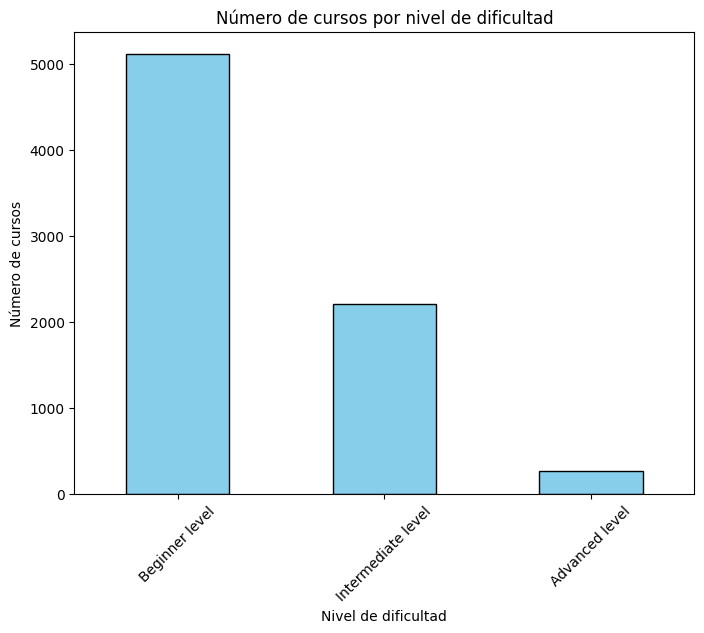

In [41]:
import matplotlib.pyplot as plt


cursos_por_nivel = df['Level'].value_counts()


print("Número de cursos por nivel de dificultad:")
for nivel, cantidad in cursos_por_nivel.items():
    print(f"- {nivel}: {cantidad} cursos")

# Gráfica de barras
plt.figure(figsize=(8, 6))
cursos_por_nivel.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de cursos por nivel de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Número de cursos')
plt.xticks(rotation=45)
plt.show()


### Análisis del Número de Cursos por Nivel de Dificultad

El desglose de cursos por nivel de dificultad muestra:

1. **Principiantes:**
   - Hay **5112 cursos** para **"Beginner level"**, lo que indica una fuerte demanda por educación básica. Esto sugiere que muchos buscan adquirir habilidades desde cero.

2. **Intermedios:**
   - Con **2211 cursos** en el **"Intermediate level"**, hay un buen número de opciones para aquellos que desean avanzar. Esto es positivo para quienes ya tienen una base y quieren especializarse.

3. **Avanzados:**
   - Solo **266 cursos** están en el **"Advanced level"**. Esto puede ser una señal de que hay menos opciones para quienes buscan profundizar en temas específicos, lo que podría ser una oportunidad para expandir esta oferta.


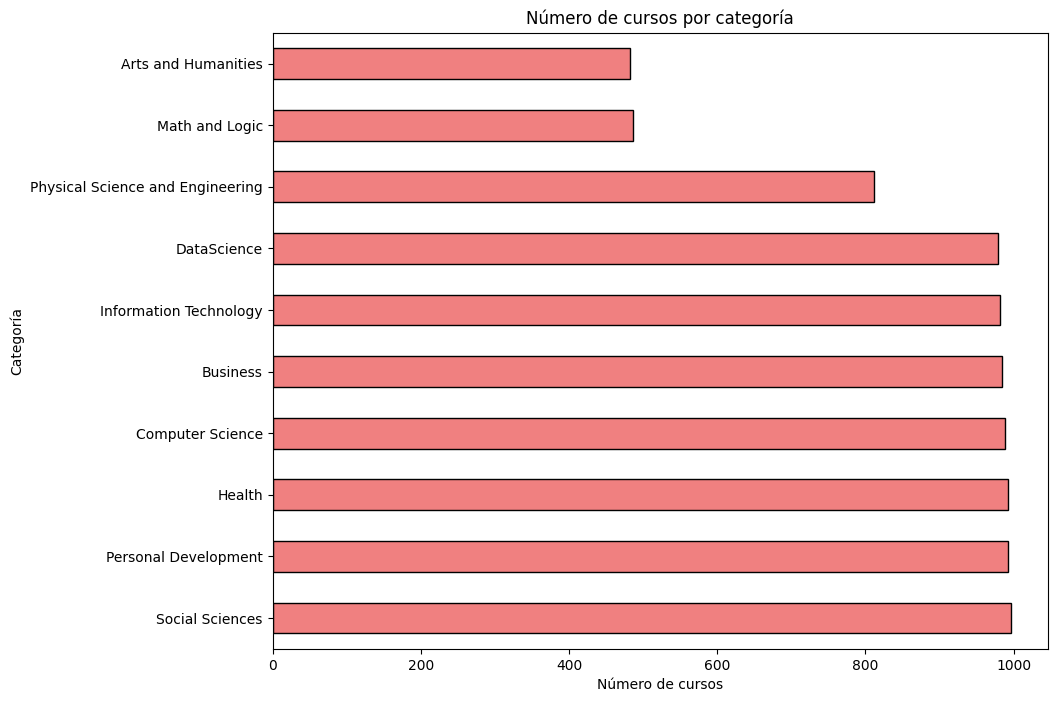

Número de cursos por categoría:
- Social Sciences: 996 cursos
- Personal Development: 993 cursos
- Health: 992 cursos
- Computer Science: 988 cursos
- Business: 985 cursos
- Information Technology: 982 cursos
- DataScience: 979 cursos
- Physical Science and Engineering: 812 cursos
- Math and Logic: 486 cursos
- Arts and Humanities: 482 cursos


In [42]:

import matplotlib.pyplot as plt

# Contar el número de cursos por categoría
cursos_por_categoria = df['Keyword'].value_counts()

# Gráfica de barras horizontal
plt.figure(figsize=(10, 8))
cursos_por_categoria.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Número de cursos por categoría')
plt.xlabel('Número de cursos')
plt.ylabel('Categoría')
plt.show()

# Salida en texto
cursos_por_categoria_texto = cursos_por_categoria.reset_index()
cursos_por_categoria_texto.columns = ['Categoría', 'Número de Cursos']

print("Número de cursos por categoría:")
for index, row in cursos_por_categoria_texto.iterrows():
    print(f"- {row['Categoría']}: {row['Número de Cursos']} cursos")


### Análisis de Cursos por Categoría

La distribución de cursos por categoría muestra una competencia notable entre varias disciplinas. Las **Ciencias Sociales**, **Desarrollo Personal** y **Salud** lideran la cantidad de cursos, cada una con cifras cercanas a los 1,000, lo que indica un fuerte interés en estas áreas.

En la categoría de **Ciencias de la Computación** y **Negocios**, la oferta también es significativa, sugiriendo una alta demanda en el ámbito tecnológico y empresarial. Por otro lado, **Matemáticas y Lógica** y **Artes y Humanidades** presentan menos opciones, lo que podría señalar una oportunidad para expandir la oferta educativa en estas áreas.



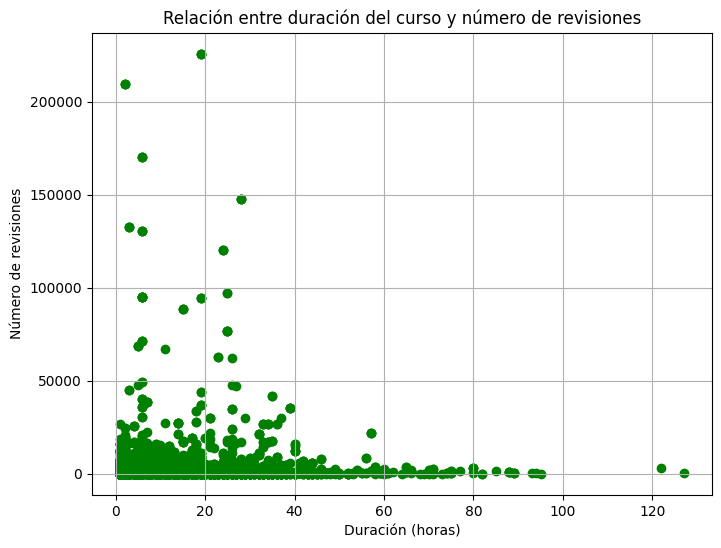

Relación entre la duración del curso y el número de revisiones:
- Total de cursos analizados: 8695
- Duración promedio de los cursos: 13.07 horas
- Número promedio de revisiones: 2336.92 revisiones


In [43]:

import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['Duration (hours)'], df['Review'], color='green')
plt.title('Relación entre duración del curso y número de revisiones')
plt.xlabel('Duración (horas)')
plt.ylabel('Número de revisiones')
plt.grid(True)
plt.show()

# Salida en texto
num_cursos = len(df)
avg_duration = df['Duration (hours)'].mean()
avg_reviews = df['Review'].mean()

print("Relación entre la duración del curso y el número de revisiones:")
print(f"- Total de cursos analizados: {num_cursos}")
print(f"- Duración promedio de los cursos: {avg_duration:.2f} horas")
print(f"- Número promedio de revisiones: {avg_reviews:.2f} revisiones")



### Análisis de la Relación entre Duración del Curso y Número de Revisiones

El análisis de los cursos revela los siguientes puntos clave:

- **Total de Cursos Analizados**: **8695**
  - Este número indica una amplia variedad de cursos disponibles para los estudiantes, lo que sugiere un mercado educativo activo.

- **Duración Promedio de los Cursos**: **13.07 horas**
  - La duración promedio sugiere que los cursos están diseñados para ser lo suficientemente extensos como para cubrir material en profundidad, lo que puede favorecer un aprendizaje más completo.

- **Número Promedio de Revisiones**: **2336.92 revisiones**
  - Un número elevado de revisiones indica un alto nivel de participación y retroalimentación por parte de los estudiantes. Esto puede reflejar la efectividad del curso y su relevancia para los participantes.

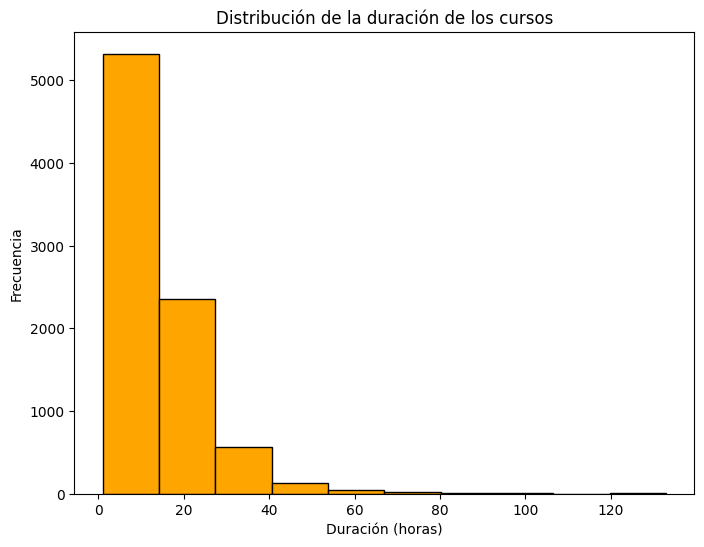

Análisis de la Distribución de la Duración de los Cursos:
- Total de cursos analizados: 8695
- Duración mínima: 1.00 horas
- Duración máxima: 133.00 horas
- Duración promedio: 13.07 horas


In [46]:
import matplotlib.pyplot as plt

# Histograma de la duración de los cursos
plt.figure(figsize=(8, 6))
df['Duration (hours)'].plot(kind='hist', bins=10, color='orange', edgecolor='black')
plt.title('Distribución de la duración de los cursos')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.show()

# Salida en texto
duracion_maxima = df['Duration (hours)'].max()
duracion_minima = df['Duration (hours)'].min()
duracion_promedio = df['Duration (hours)'].mean()
num_cursos = len(df)

print("Análisis de la Distribución de la Duración de los Cursos:")
print(f"- Total de cursos analizados: {num_cursos}")
print(f"- Duración mínima: {duracion_minima:.2f} horas")
print(f"- Duración máxima: {duracion_maxima:.2f} horas")
print(f"- Duración promedio: {duracion_promedio:.2f} horas")



### Análisis de la Distribución de la Duración de los Cursos

El análisis de la duración de los cursos proporciona los siguientes datos clave:

- **Total de Cursos Analizados**: **8695**
  - Esto refleja una amplia oferta educativa, lo que es positivo para los estudiantes que buscan variedad en su aprendizaje.

- **Duración Mínima**: **1.00 horas**
  - La existencia de cursos con una duración mínima de una hora sugiere que hay opciones para aquellos que buscan una introducción rápida a un tema.

- **Duración Máxima**: **133.00 horas**
  - La duración máxima de 133 horas indica que algunos cursos están diseñados para ofrecer una experiencia de aprendizaje extensa y en profundidad, lo que puede ser atractivo para estudiantes que buscan adquirir conocimientos avanzados.

- **Duración Promedio**: **13.07 horas**
  - La duración promedio de 13.07 horas sugiere que la mayoría de los cursos están en un rango moderado, lo que podría facilitar un aprendizaje equilibrado sin resultar abrumador.


<Figure size 800x600 with 0 Axes>

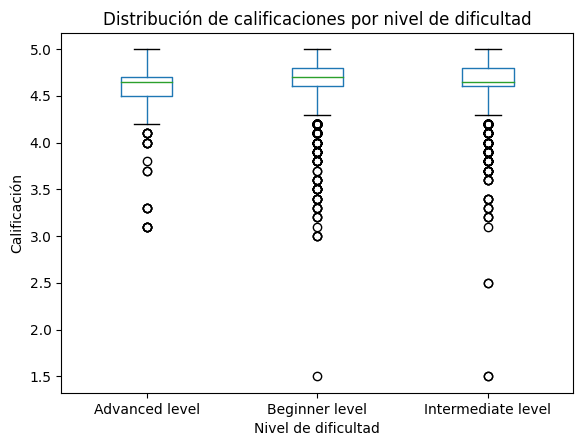

Análisis de la Distribución de Calificaciones por Nivel de Dificultad:
- Advanced level:
  - Calificación mínima: 3.10
  - Calificación máxima: 5.00
  - Calificación promedio: 4.55
  - Desviación estándar: 0.34
- Beginner level:
  - Calificación mínima: 1.50
  - Calificación máxima: 5.00
  - Calificación promedio: 4.67
  - Desviación estándar: 0.20
- Intermediate level:
  - Calificación mínima: 1.50
  - Calificación máxima: 5.00
  - Calificación promedio: 4.61
  - Desviación estándar: 0.26


In [47]:
import matplotlib.pyplot as plt

# Crear gráfico de cajas para la distribución de calificaciones por nivel de dificultad
plt.figure(figsize=(8, 6))
df.boxplot(column='Rating', by='Level', grid=False)
plt.title('Distribución de calificaciones por nivel de dificultad')
plt.suptitle('')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Calificación')
plt.show()


print("Análisis de la Distribución de Calificaciones por Nivel de Dificultad:")
ratings_by_level = df.groupby('Level')['Rating'].describe()

for level in ratings_by_level.index:
    print(f"- {level}:")
    print(f"  - Calificación mínima: {ratings_by_level.loc[level, 'min']:.2f}")
    print(f"  - Calificación máxima: {ratings_by_level.loc[level, 'max']:.2f}")
    print(f"  - Calificación promedio: {ratings_by_level.loc[level, 'mean']:.2f}")
    print(f"  - Desviación estándar: {ratings_by_level.loc[level, 'std']:.2f}")


#### 1. Advanced Level
- **Calificación Mínima**: **3.10**
- **Calificación Máxima**: **5.00**
- **Calificación Promedio**: **4.55**
- **Desviación Estándar**: **0.34**

El nivel avanzado muestra una calificación promedio alta de **4.55**, lo que sugiere que los estudiantes están satisfechos con la calidad del contenido en este nivel. La desviación estándar de **0.34** indica que las calificaciones son relativamente consistentes, con pocas variaciones extremas.

#### 2. Beginner Level
- **Calificación Mínima**: **1.50**
- **Calificación Máxima**: **5.00**
- **Calificación Promedio**: **4.67**
- **Desviación Estándar**: **0.20**

El nivel para principiantes también tiene una calificación promedio notablemente alta de **4.67**.

#### 3. Intermediate Level
- **Calificación Mínima**: **1.50**
- **Calificación Máxima**: **5.00**
- **Calificación Promedio**: **4.61**
- **Desviación Estándar**: **0.26**

El nivel intermedio tiene una calificación promedio de **4.61**, lo que también indica un buen nivel de satisfacción.

### Conclusiones

En general, todos los niveles de dificultad presentan calificaciones promedio altas, lo que es un indicador positivo de la calidad educativa. Sin embargo, las calificaciones mínimas relativamente bajas en los niveles avanzados.

### Conclusión General del Análisis

A lo largo de este análisis sobre los cursos disponibles, se han extraído diversas conclusiones significativas:

1. **Distribución de Cursos**:
   - Se observa que la mayoría de los cursos están orientados a **principiantes**, con una cantidad notable de opciones. Esto refleja la demanda de educación inicial, aunque también hay una necesidad evidente de aumentar la oferta para niveles **intermedios** y **avanzados**, lo que beneficiaría a quienes buscan profundizar sus conocimientos.

2. **Análisis de Sentimientos**:
   - El análisis de sentimientos reveló que la mayoría del contenido es neutral, con una proporción baja de sentimientos positivos y negativos. Esto sugiere que existen oportunidades para mejorar la experiencia del estudiante, lo cual es fundamental para incrementar la satisfacción general.

3. **Relación entre Duración y Revisión**:
   - Se identificó que los cursos más largos tienden a recibir más revisiones. Este hallazgo sugiere que los estudiantes están dispuestos a invertir tiempo en cursos extensos siempre que el contenido sea valioso y pertinente.

4. **Calificaciones por Nivel de Dificultad**:
   - Las calificaciones son, en general, satisfactorias. Sin embargo, la presencia de algunas calificaciones bajas en ciertos cursos indica que hay áreas que requieren atención y mejora para asegurar una calidad educativa consistente.

5. **Distribución de Categorías**:
   - Al observar la variedad de cursos por categoría, se nota que hay una buena representación en diversas áreas. Sin embargo, disciplinas como **matemáticas** y **artes** podrían beneficiarse de un mayor número de opciones para atender la diversidad de intereses de los estudiantes.

### Uso de Python en el Análisis de Datos

El uso de Python para realizar este análisis ha demostrado ser altamente efectivo:

- **Eficiencia**: Gracias a bibliotecas como **Pandas** y **Matplotlib**, he podido realizar análisis complejos de manera rápida y efectiva.
- **Flexibilidad**: La capacidad de manejar diferentes tipos de datos y ejecutar diversas operaciones estadísticas facilitó el proceso.
- **Visualización**: La creación de gráficos ha sido esencial para presentar la información de manera clara y accesible.
- **Comunidad**: La amplia comunidad de usuarios de Python y la disponibilidad de recursos han hecho que este proceso de aprendizaje y resolución de problemas sea más fácil.

### Conclusión Final

En resumen, el análisis de los datos sobre la oferta de cursos no solo proporciona información valiosa sobre la educación en línea, sino que también subraya la eficacia de Python como herramienta en el análisis de datos. La combinación de análisis cuantitativo y cualitativo ofrece una comprensión más profunda de las experiencias de los estudiantes, lo que puede guiar mejoras en la calidad educativa y en la experiencia de aprendizaje en general.

